# Communnity Detection algorithm

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg as LA
from itertools import combinations
from collections import Counter
from collections import defaultdict
import time

**Numpy eigen vector**

numpy.linalg.eig(a)[source]           
Compute the eigenvalues and right eigenvectors of a square array.           

Parameters:	           
a : (…, M, M) array             
Matrices for which the eigenvalues and right eigenvectors will be computed        

Returns:	          
w : (…, M) array            
The eigenvalues, each repeated according to its multiplicity. The eigenvalues are not necessarily ordered. The resulting array will be of complex type, unless the imaginary part is zero in which case it will be cast to a real type. When a is real the resulting eigenvalues will be real (0 imaginary part) or occur in conjugate pairs          

v : (…, M, M) array        
The normalized (unit “length”) eigenvectors, such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].       

Raises:	     
LinAlgError      
If the eigenvalue computation does not converge.       

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


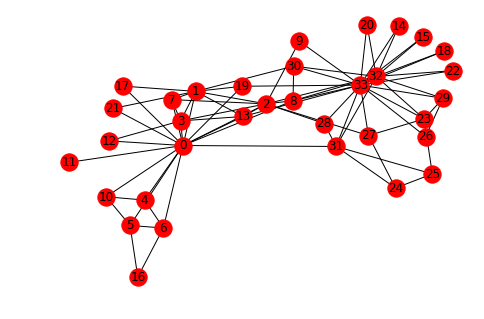

In [2]:
G = nx.karate_club_graph()
nx.draw(G,with_labels = True,pos = nx.fruchterman_reingold_layout(G))

## 1. Spectral partition algorithm

In [3]:
def spectral_partition(G,normalize = False):
    
    '''
        Desc: This function implement spectral partition on a graph
        Draw an image using networkx and matplotlib
        
        Params:
            G: a networkx graph
        Returns:
            partition results - numpy array
    
    '''
    # calculated node degrees, sort by node order
    ordered_degrees = np.array([deg for node, deg in sorted(list(G.degree()),key = lambda x:x[0])]).reshape((1,-1))

    # identity matrix
    eye = np.eye(len(G.nodes()))

    # adjacency matrix
    A = nx.adj_matrix(G).toarray()

    # degree matrix
    D = eye * ordered_degrees

    # laplacian matrix
    L = D - A
    assert A.shape == D.shape == L.shape
    
    if normalize:
        L = np.dot(LA.inv(D),L)

    # find eigen values and eigen vectors
    lambdas, vectors = LA.eig(L)

    # the second smallest eigen value and corresponding eigen vector
    second_smallest_ev = np.partition(lambdas, 1)[1]
    second_smallest_loc = np.where(lambdas == second_smallest_ev)[0][0]
    
    
    # retrieve sign of eigen vector elements
    x2 = vectors[:,second_smallest_loc]
    s2 = (x2 > 0).astype(int)
    s2[s2 ==0] = -1
    
    # draw graph
    nx.draw(G,node_color=s2,with_labels = True,pos = nx.fruchterman_reingold_layout(G))
    plt.show()
    
    return s2,x2

**Graph cut**

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


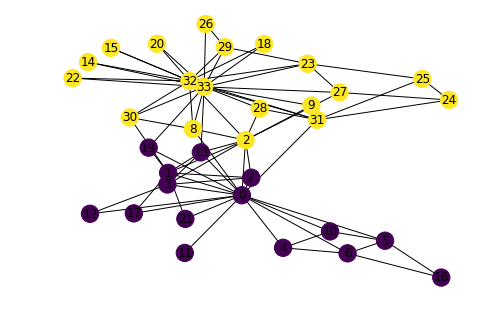

In [4]:
s2,x2 = spectral_partition(G,normalize=False)

**Normalize cut**

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


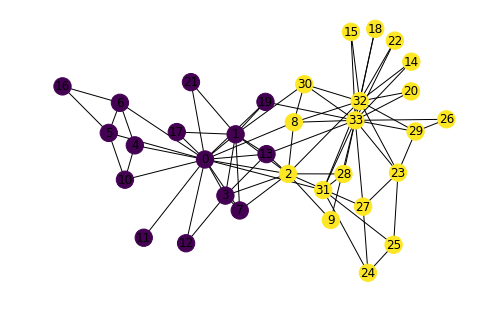

In [5]:
s2,x2 = spectral_partition(G,normalize=True)

**Eigen vector element distribution**

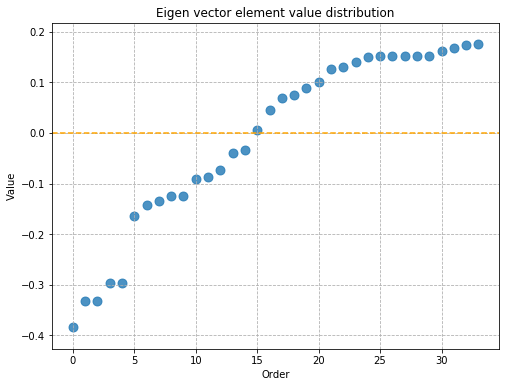

In [6]:
sorted_evec = sorted(x2)
order = np.arange(len(sorted_evec))

fig,ax = plt.subplots(figsize = (8,6))
plt.scatter(order,sorted_evec,alpha = 0.8,s = 80)
plt.grid(True,linestyle  = '--')
plt.title("Eigen vector element value distribution")
plt.xlabel("Order")
plt.ylabel("Value")
plt.axhline(0,linestyle = '--',color = 'orange')
plt.show()

**Manual split cut point according to distribution curve**

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


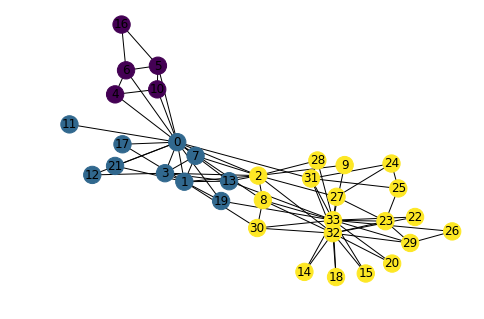

In [7]:
s3 = s2.copy()
x3 = x2.copy()
s3[x2< -0.25] = -2

nx.draw(G,node_color=s3,with_labels = True,pos = nx.fruchterman_reingold_layout(G))
plt.show()

## 2. Modularity maximization algorithm

In [8]:
G = nx.karate_club_graph()

def modularity_maxization(G):

    # calculated node degrees, sort by node order
    k = np.array([deg for node, deg in sorted(list(G.degree()),key = lambda x:x[0])]).reshape((-1,1))
    m = len(G.edges())
    A = nx.adj_matrix(G).toarray()
    B = A - (1/(2*m)) * (np.dot(k,k.T))

    assert A.shape == B.shape

    # find eigen values and eigen vectors
    lambdas, vectors = LA.eig(B)


    max_lambda = np.max(lambdas)
    max_lambda_loc = np.where(lambdas == max_lambda)[0][0]


    # retrieve sign of eigen vector elements
    x1 = vectors[:,max_lambda_loc]
    s1 = (x1 > 0).astype(int)
    s1[s1 ==0] = -1

    # draw graph
    nx.draw(G,node_color=s1,with_labels = True,pos = nx.fruchterman_reingold_layout(G))
    plt.show()
    
    return s1,x1

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


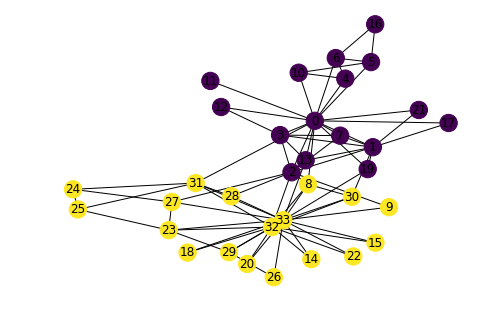

In [9]:
s2,x2 = modularity_maxization(G)

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


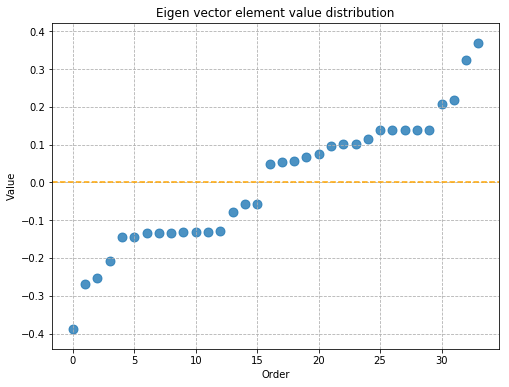

In [10]:
sorted_evec = sorted(x2)
order = np.arange(len(sorted_evec))

fig,ax = plt.subplots(figsize = (8,6))
plt.scatter(order,sorted_evec,alpha = 0.8,s = 80)
plt.grid(True,linestyle  = '--')
plt.title("Eigen vector element value distribution")
plt.xlabel("Order")
plt.ylabel("Value")
plt.axhline(0,linestyle = '--',color = 'orange')
plt.show()

**Test on barbell graph**

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


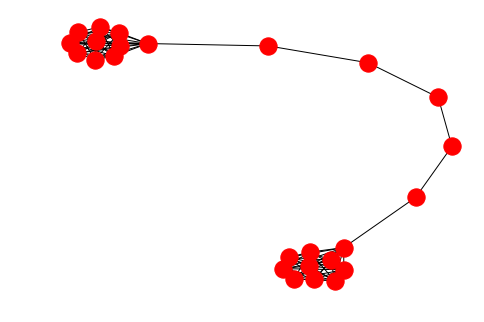

In [11]:
T = nx.barbell_graph(10,5)
nx.draw(T)

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


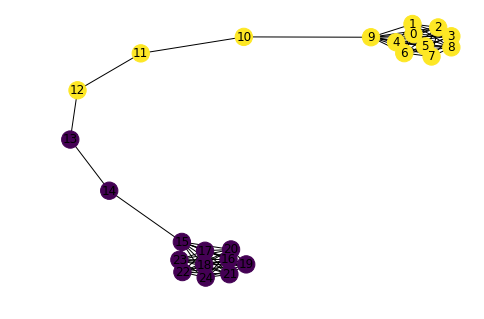

(array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1]),
 array([ 2.23206503e-01,  2.23206503e-01,  2.23206503e-01,  2.23206503e-01,
         2.23206503e-01,  2.23206503e-01,  2.23206503e-01,  2.23206503e-01,
         2.23206503e-01,  2.25739923e-01,  2.53629563e-02,  2.81455676e-03,
         3.69941719e-18, -2.81455676e-03, -2.53629563e-02, -2.25739923e-01,
        -2.23206503e-01, -2.23206503e-01, -2.23206503e-01, -2.23206503e-01,
        -2.23206503e-01, -2.23206503e-01, -2.23206503e-01, -2.23206503e-01,
        -2.23206503e-01]))

In [12]:
modularity_maxization(T)

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


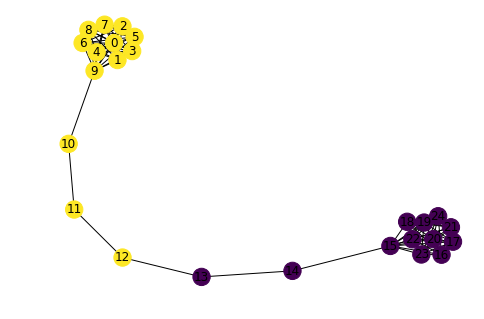

(array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1]),
 array([ 2.18292537e-01,  2.18292537e-01,  2.18292537e-01,  2.18292537e-01,
         2.18292537e-01,  2.18292537e-01,  2.18292537e-01,  2.18292537e-01,
         2.18292537e-01,  2.11590509e-01,  1.44775989e-01,  7.35165487e-02,
         4.19673477e-16, -7.35165487e-02, -1.44775989e-01, -2.11590509e-01,
        -2.18292537e-01, -2.18292537e-01, -2.18292537e-01, -2.18292537e-01,
        -2.18292537e-01, -2.18292537e-01, -2.18292537e-01, -2.18292537e-01,
        -2.18292537e-01]))

In [13]:
spectral_partition(T)

## 3. Clique percolation

k-clique: a clique with k nodes       
k-clique communities is a union of all k-cliques that can be reached from each other through a series of ajacent k-cliques         
2 cliques are said to be adjacent if they share k-1 nodes

In [14]:
def k_clique_percolation(G,k = 4,plot_matrix  = False):
    
    
    '''
        Desc: assuming G is a connected graph
        find communities based on k clique percolation
        
        Params:
            G: network x graph
            k: clique size to be merged
            plot_matrix: boolean, whether to make a plot
            
        Returns:
            colors - indicator list, 
            label assigned graph - networkx graph
    '''
    
    # set initial values of community
    for node,d in G.nodes(data = True):
        d['community'] = -1
    
    # find maximal cliques
    cliques = list(nx.find_cliques(G))

    # sort cliques on clique size and assign sizes to size dictionary(create clique id)
    sorted_cliques = {idx:cli for idx,cli in enumerate(sorted(cliques,key = lambda x:len(x),reverse=True))}
    clique_sizes = {idx:len(cli) for idx, cli in sorted_cliques.items()}

    # initialize percolation matrix with clique size
    percolation_matrix = np.eye(len(sorted_cliques)) * np.array(list(clique_sizes.values()))

    # fill overlapping values to percolation matrix
    for cliq1, cliq2 in combinations(range(len(cliques)),2):
        set1 = set(sorted_cliques[cliq1])
        set2 = set(sorted_cliques[cliq2])
        num_nodes_overlap = len(set1.intersection(set2))
        percolation_matrix[cliq1,cliq2] = num_nodes_overlap
        percolation_matrix[cliq2,cliq1] = num_nodes_overlap

    if plot_matrix:  
        # make a plot - percolation matrix
        plt.subplots(figsize = (18,12))
        sns.heatmap(percolation_matrix,annot = True)
        plt.show()

    # remove diagonoal elements less than k
    for i in range(percolation_matrix.shape[0]):
        diag_val = percolation_matrix[i,i]
        if diag_val < k:
            percolation_matrix[i,i] =0

    # remove matrix values less than k - 1, and convert matrix to onehot(zero or not)
    percolation_matrix[percolation_matrix < (k-1)] = 0
    percolation_matrix[percolation_matrix > 0] = 1 

    if plot_matrix:  
        # make a plot -  decision matrix
        plt.subplots(figsize = (18,12))
        sns.heatmap(percolation_matrix,annot = True)
        plt.show()

    # construct a clique graph(with cliques being node, percolation matrix as edges connected) - has overlapping as edge
    tempG = nx.from_numpy_matrix(percolation_matrix)

    # find connected maximalcliques
    conn_comp = list(nx.connected_components(tempG))
    
    # convert to original communities
    communities = []
    for comm in conn_comp:
        comm_nodes = [nodes for cli in comm for nodes in sorted_cliques[cli]]
        communities.append(set(comm_nodes))

    communities =  [comm for comm in communities if len(comm)>=k]
    
    print('Find communities:  ',communities)

    for comm_id, nodes in enumerate(communities):
        for node in nodes:
            if G.node[node]['community'] == -1:
                G.node[node]['community'] = comm_id

    colors = [d['community'] for node, d in G.nodes(data = True)]

    nx.draw(G,node_color=colors,with_labels = True)
    plt.show()
    
    return colors,G

Find communities:   [{0, 1, 2, 3, 7, 13}, {32, 33, 8, 30}, {32, 33, 29, 23}]


/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


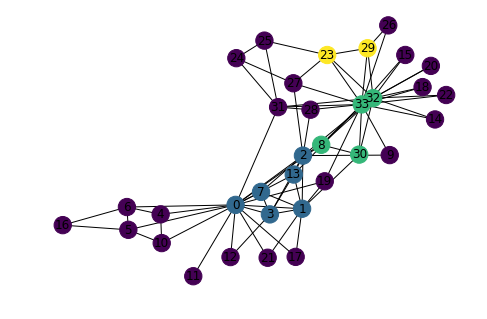

In [15]:
G = nx.karate_club_graph()
colors,G = k_clique_percolation(G,4,plot_matrix = False)

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


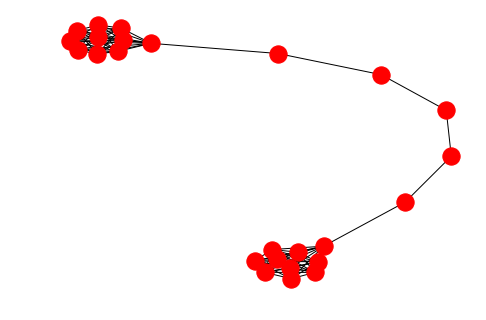

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Find communities:   [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {15, 16, 17, 18, 19, 20, 21, 22, 23, 24}]


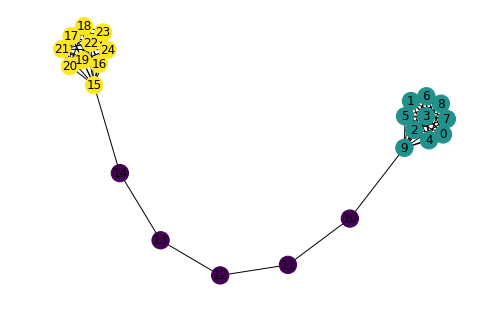

In [16]:
T = nx.barbell_graph(10,5)
nx.draw(T)
plt.show()
colors,G = k_clique_percolation(T,8,plot_matrix=False)
G.nodes(data = True)
plt.show()

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


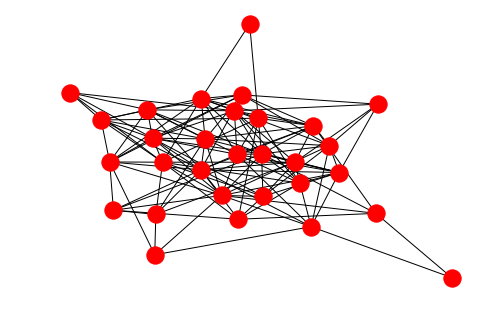

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Find communities:   [{0, 2, 8, 20, 23}, {4, 19, 20, 21, 22}, {8, 14, 15, 19, 21}, {1, 3, 7, 10, 14, 15, 28}, {0, 10, 22, 23, 26}, {1, 20, 22, 28, 29}]


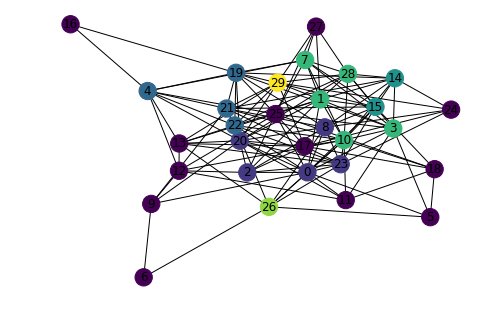

In [17]:
def create_random_graph_kclique(n = 20,p = 0.1, k = 5, num_cliqs = 10):
    
    '''
        Params:
            n: number of nodes
            p: intial probability of connection between 2 nodes
            k: size of clique to create (randomly)
            num_cliques: number of cliques to create
    
    '''
    # create a random graph
    G = nx.erdos_renyi_graph(n,p)


    # ensure connected graph - easy for visualization
    for node in G.nodes():
        if len(list(G.neighbors(node))) == 0:
            random_node = np.random.choice(G.nodes())
            G.add_edge(node,random_node)

    # make cliques randomly
    for _ in range(num_cliqs):
        cliq = np.random.choice(G.nodes(),size = k)
        for n1,n2 in combinations(cliq,2):
            G.add_edge(n1,n2)
    return G


G = create_random_graph_kclique(n = 30,p = 0.15)   
# draw network structure
nx.draw(G)
plt.show()

# k clique percolation method
k_clique_percolation(G,5,plot_matrix=False)
plt.show()

## 4. Label propagation algorithm - nearest neighbors

1. Initialize labels on all nodes(all nodes assigned to its own label).
2. Randomize node order.
3. For every node, replace its label with highest occuring label of its neighbors.
4. If every node has a label thant maximum its neighbors have, stop algorithm.

In [18]:
def label_propagation(G,max_iterations = 100):
    
    
    # initialized labels
    for n,d in G.nodes(data=True):
        d['community'] = n

    n_nodes = len(G.nodes())

    for i in range(max_iterations):

        # randomize node order
        node_sequence = np.random.permutation(list(G.nodes())).tolist()

        # assign label to all nodes
        altered_nodes = 0
        for node in node_sequence:
            neighbors = G.neighbors(node)
            
            # check if a nodes is not connected to any other nodes
            if not len(list(neighbors)) > 0:
                continue
            
            # reassign labels
            label = Counter([G.node[nei]['community'] for nei in G.neighbors(node)]).most_common()[0][0]
            if G.node[node]['community'] != label:
                G.node[node]['community'] = label
                altered_nodes += 1

        print('Iteration {}: altered_nodes: {}'.format(i, altered_nodes))
        if altered_nodes ==0:
            break

    colors = [d['community'] for n,d in G.nodes(data = True)]
    nx.draw(G,node_color=colors,with_labels = True)
    plt.show()
    
    return G


def unfold_result(G):
    comm_nodes = defaultdict(list)
    for n,d in G.nodes(data = True):
        comm_nodes[d['community']].append(n) 
    detect_result = pd.DataFrame(sorted(comm_nodes.items(),key = lambda x: len(x[1]),reverse=True),columns = ['Community','Node_list'])
    return detect_result

Iteration 0: altered_nodes: 31
Iteration 1: altered_nodes: 4
Iteration 2: altered_nodes: 1
Iteration 3: altered_nodes: 0


/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


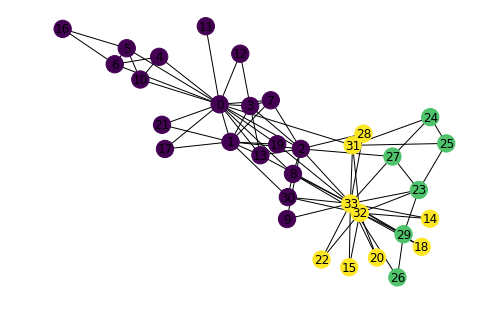

,Community,Node_list
0,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,32,"[14, 15, 18, 20, 22, 28, 31, 32, 33]"
2,23,"[23, 24, 25, 26, 27, 29]"


In [21]:
G = nx.karate_club_graph()
G = label_propagation(G)
overview = unfold_result(G)
overview

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


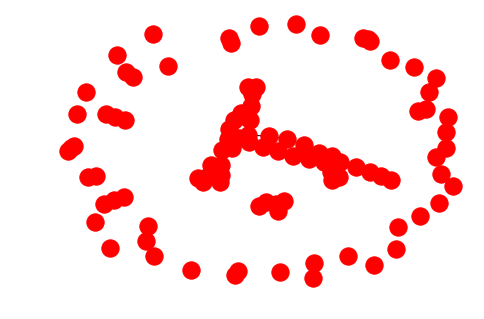

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Iteration 0: altered_nodes: 44
Iteration 1: altered_nodes: 4
Iteration 2: altered_nodes: 0


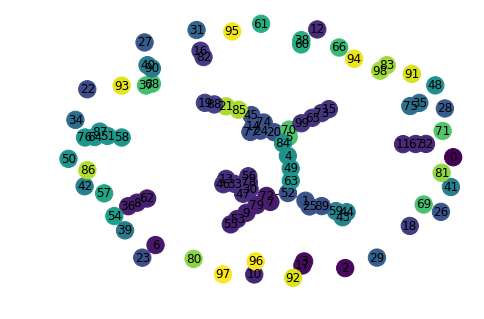

,Community,Node_list
0,13,"[13, 30, 33, 46, 47, 56, 78]"
1,24,"[14, 20, 24, 45, 74, 77]"
2,51,"[51, 58, 64, 76, 87]"
3,25,"[1, 25, 52, 89]"
4,49,"[4, 49, 63, 84]"
5,9,"[9, 53, 55, 79]"
6,15,"[15, 65, 73, 99]"
7,8,"[8, 36, 62]"
8,11,"[11, 32, 67]"
9,43,"[43, 44, 59]"


In [22]:
G = nx.erdos_renyi_graph(100,p = 0.01)
nx.draw(G,pos = nx.spring_layout(G))
plt.show()
G = label_propagation(G)
unfold_result(G)

## 5. Louvain method （Existing package）

**Procedure:**      
- Algorithm
- Assign every node to its own community
- Phase I
    - For every node evaluate modularity gain from removing node from its community and placing it in the community of its neighbor
    - Place node in the community maximizing modularity gain
    - repeat until no more improvement (local max of modularity)
- Phase II
    - Nodes from communities merged into "super nodes" Weight on the links added up
    - Repeat until no more changes (max modularity)

Implementation on github https://github.com/taynaud/python-louvain

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


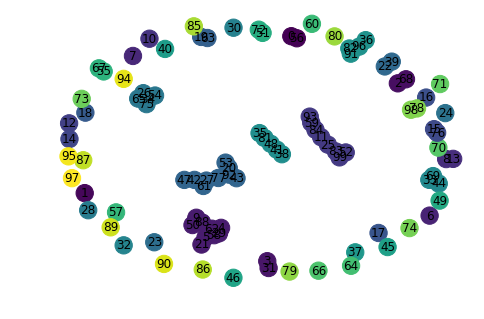

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


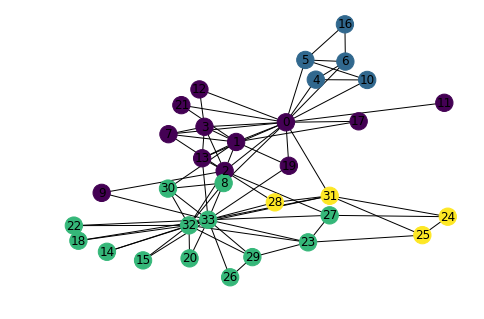

In [23]:
from community import best_partition, modularity

G=nx.erdos_renyi_graph(100, 0.01)

partition = best_partition(G)

nx.draw(G,node_color=list(partition.values()),with_labels = True)
plt.show()

for n, community in partition.items():
    G.node[n]['community'] = community
    
unfold_result(G)
G = nx.karate_club_graph() 
partition = best_partition(G)
nx.draw(G,node_color=list(partition.values()),with_labels = True)
plt.show()

## 6. Girvan Newman Method

**Modularity from networkx**

```python
nx.community.quality.modularity(networkx_graph, list_of_sets_of_community_nodes)
```


Help on function modularity in module networkx.algorithms.community.quality:

modularity(G, communities, weight='weight')
    Returns the modularity of the given partition of the graph.
    
    Modularity is defined in [1]_ as
    
    .. math::
    
$Q = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_ik_j}{2m}\right)\delta(c_i,c_j)$, where 
    
$m$ is the number of edges,        
$A$ is the adjacency matrix of`G`,          
$k_i$ is the degree of $i$ and            
$\delta(c_i, c_j)$is 1 if $i$ and $j$ are in the same community and 0 otherwise.          
    
    Parameters
    ----------
    G : NetworkX Graph
    
    communities : list
        List of sets of nodes of `G` representing a partition of the
        nodes.
    
    Returns
    -------
    Q : float
        The modularity of the paritition.
    
    Raises
    ------
    NotAPartition
        If `communities` is not a partition of the nodes of `G`.
    
    Examples
    --------
    >>> G = nx.barbell_graph(3, 0)
    >>> nx.algorithms.community.modularity(G, [{0, 1, 2}, {3, 4, 5}])
    0.35714285714285704
    
    References
    ----------
    .. [1] M. E. J. Newman *Networks: An Introduction*, page 224.
       Oxford University Press, 2011.

In [29]:
G = nx.karate_club_graph()

def girvan_newman(G, early_stop = False):
    
    
    g = G.copy()

    # modularity history
    modus = []

    # connected_components
    cc = list(nx.connected_components(g))

    # calculate modularity
    modu = nx.community.quality.modularity(g,cc)
    modus.append(modu)
    
    # connected components - communities
    cc_hist = [cc]
    
    # {modularity: nx graph} key value pairs
    graph_lookup = dict()
    
    # edge cut history
    cut_history = [(-1,-1)]


    for i in range(len(g.edges()) - 1):
        
        # calculate edge betweenness
        edge_betweenness = nx.edge_betweenness_centrality(g)
        #print('Betweenness centrality time: {}'.format(toc-tic))

        # sort edge betweenness
        u,v = max(edge_betweenness,key = edge_betweenness.get)
        g.remove_edge(u,v)
        
        # connected components subgraph
        cc = list(nx.connected_components(g))
        cc_hist.append(cc)
        cut_history.append((u,v))

        # calculate modularity
        modu = nx.community.quality.modularity(G,cc)
        
        modus.append(modu)
        graph_lookup[i] = (modu,list(nx.connected_components(g)))
        
        if early_stop and (max(modus) not in modus[-5:]):
            break

    fig,ax = plt.subplots(figsize = (8,6))
    plt.plot(np.arange(len(modus)),modus,linewidth = 4)
    plt.grid(linestyle = '--')
    plt.title("Girvan Newman Modularity Curve",fontsize = 15)
    plt.xlabel("# Iteration",fontsize =13)
    plt.ylabel("Modularity Score",fontsize =13)
    plt.show()

    iterations, lookups = sorted(graph_lookup.items(),key = lambda x:x[1][0],reverse = True)[0]
    modularity, communities = lookups

    for comm_id,community in enumerate(communities):
        for node in community:
            G.node[node]['community'] = comm_id

    colors = [ d['community'] for n,d in G.nodes(data = True)]

    nx.draw(G,node_color=colors,with_labels = True)
    plt.show()
    
    return {
        'best_modularity':modularity,
        'communities':communities,
        'iterations':iterations,
        'modularity_history':modus,
        'community_history':cc_hist,
        'cut_history':cut_history
    }

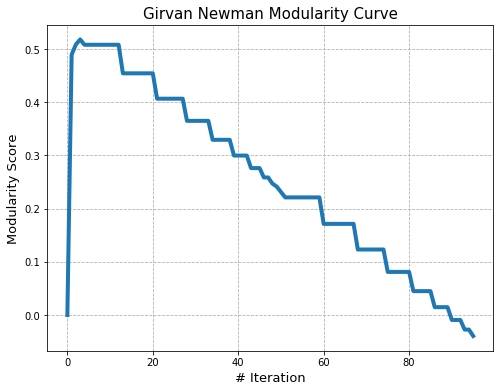

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


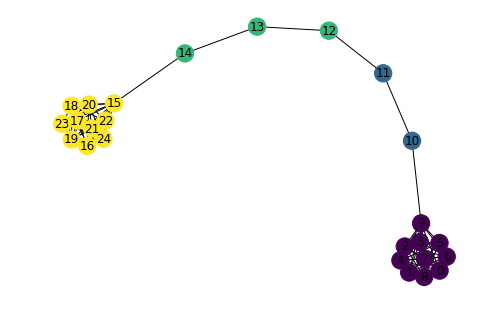

In [30]:
result = girvan_newman(nx.barbell_graph(10,5),early_stop=False)

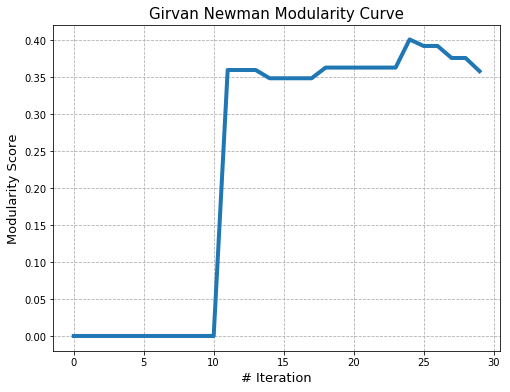

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


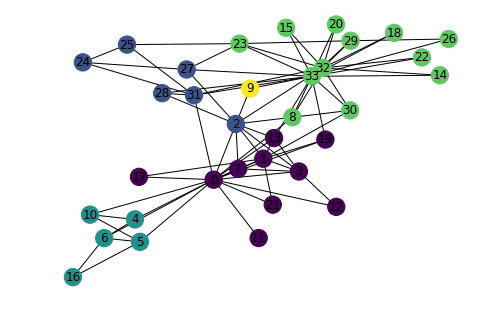

In [31]:
result = girvan_newman(nx.karate_club_graph(),early_stop = True)

**Real world dataset test**

In [32]:
# with open('email-Eu-core.txt','r') as f:
#     node_list = []
#     for line in f:
#         n1,n2 = line.split()
#         node_list.append([int(n1),int(n2)])

# G = nx.from_edgelist(np.array(node_list))

# girvan_newman(G,early_stop=True)

## 7. Hierachical Clustering based on cosine similarity - (Always bad idea)

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.cluster.hierarchy import fcluster

In [34]:
G = nx.karate_club_graph()

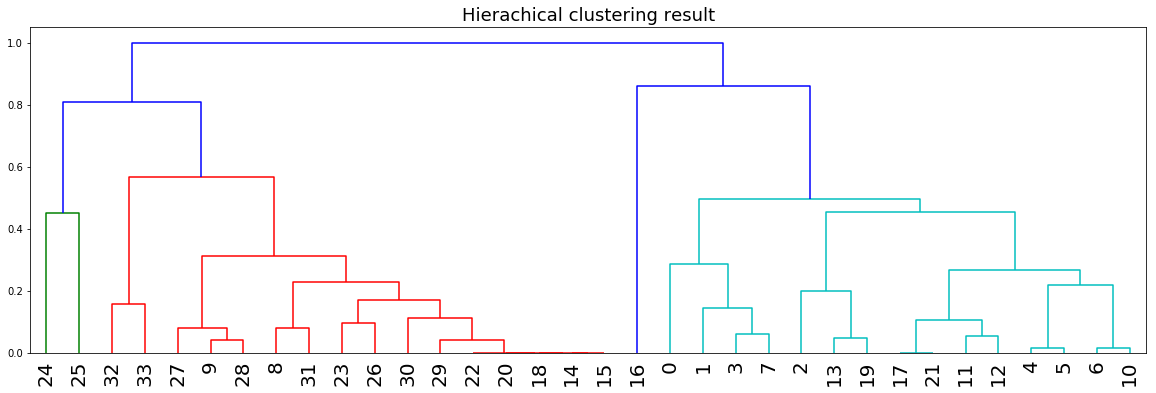

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


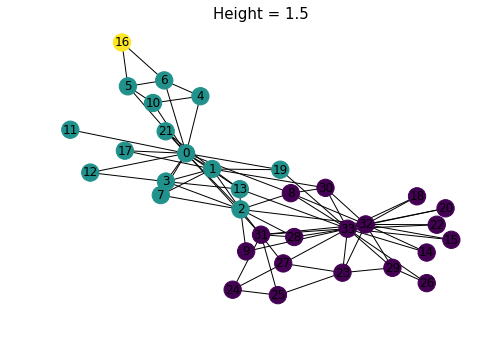

In [40]:
adj_matrix = nx.adj_matrix(G).toarray()
cos_sim = cosine_similarity(adj_matrix)
fig,ax = plt.subplots(figsize = (20,6))
mergeings = linkage(cos_sim,method = 'complete',metric = 'cosine')

dendro = dendrogram(mergeings,labels = np.arange(len(cos_sim)),leaf_rotation = 90,leaf_font_size = 20)
plt.title("Hierachical clustering result",fontsize = 18)
plt.show()

labels = fcluster(mergeings, 3,criterion = 'maxclust')
nx.draw(G,node_color = labels,with_labels = True)
plt.title('Height = 1.5',fontsize = 15)
plt.show()


## 8. Walktrap algorithm - random walk t step (select t as hypterparameter)

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


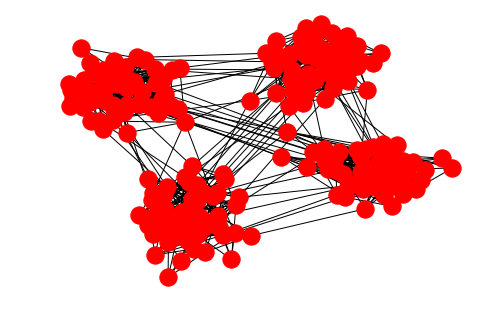

In [41]:
import numpy as np
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
def make_clique_type_graph(n_nodes = 300,n_comm =  4,in_comm_edges = 800,n_edges_cross_comms =  30):

    nodes = np.arange(0,n_nodes).tolist()
    nodes_comm =  int(len(nodes) / n_comm)
    comms = [nodes[i*nodes_comm:(i+1)*nodes_comm] for i in range(n_comm)]

    G = nx.Graph()
    for comm in comms:
        G.add_nodes_from(comm)
        for _ in range(in_comm_edges):
            u,v = np.random.choice(comm,2).tolist()
            G.add_edge(u,v)



    edges = []
    for comm1, comm2 in  combinations(range(len(comms)),2):
        for i in range(n_edges_cross_comms):
            edges.append([np.random.choice(comms[comm1]), np.random.choice(comms[comm2])])

    G.add_edges_from(edges)
    return G

G = make_clique_type_graph(200,4,300,10)
nx.draw(G)

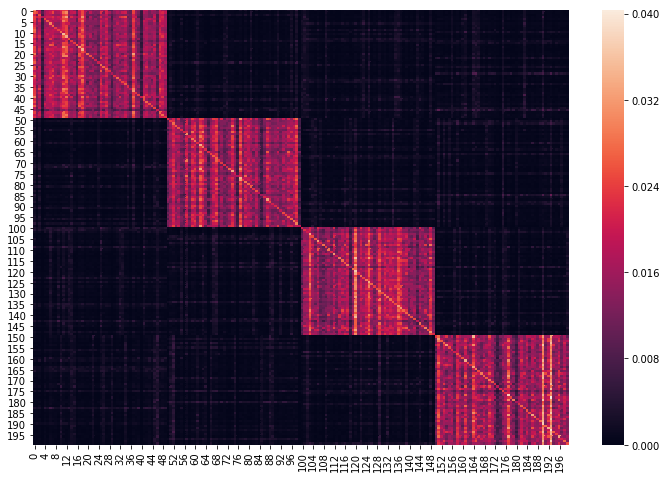

In [43]:
def random_walk_t_step(G,t = 3):
    degrees = [d for n, d in sorted(dict(nx.degree(G)).items(),key =lambda x:x[0])]
    D = np.eye(len(G.nodes))*degrees
    A = nx.adj_matrix(G).toarray()
    P = np.dot(np.linalg.inv(D),A)
    Pt = P.copy()
    for _ in range(t):
        Pt = np.dot(Pt,P)
    return Pt,D,A

fig,ax = plt.subplots(figsize = (12,8))
sns.heatmap(random_walk_t_step(G)[0])
plt.show()

In [45]:
n_nodes = len(G.nodes())

# randomwalk t step
Pt,D,A = random_walk_t_step(G,3)
D_12 = np.sqrt(np.linalg.inv(D))

# similarity matrix
sim_mat = np.zeros((n_nodes,n_nodes))
for i in range(n_nodes):
    for j in range(n_nodes):
        sim_ij = np.sqrt(np.square(np.dot(D_12,Pt[i,:]) - np.dot(D_12,Pt[j,:])).sum())
        sim_mat[i,j] = sim_ij

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


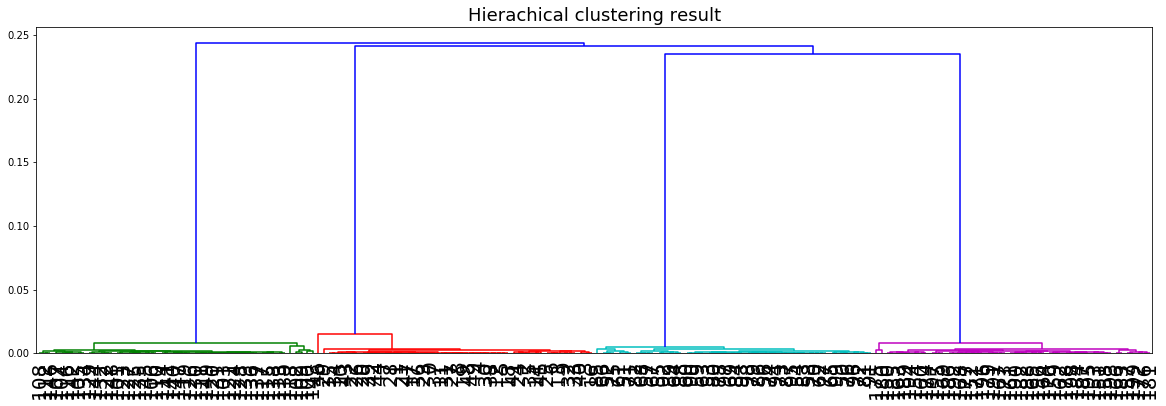

In [46]:
fig,ax = plt.subplots(figsize = (20,6))
mergeings = linkage(sim_mat,method = 'complete',metric = 'cosine')

dendro = dendrogram(mergeings,labels = np.arange(n_nodes),leaf_rotation = 90,leaf_font_size = 20)
plt.title("Hierachical clustering result",fontsize = 18)
plt.show()

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


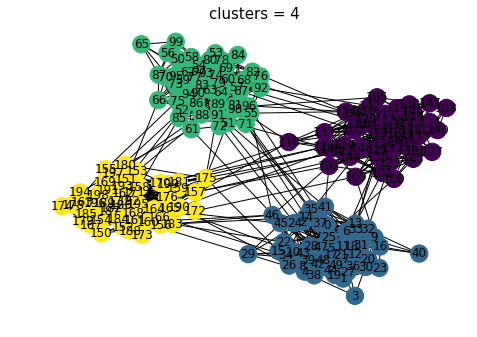

In [48]:
labels = fcluster(mergeings, 4,criterion = 'maxclust')
nx.draw(G,node_color = labels,with_labels = True)
plt.title('clusters = 4',fontsize = 15)
plt.show()

## 9. Randomwalk approximation (statistical simulation)
**Hyperaparameter to tune:**      
- k - number of statistical simulation per node, affect calculation speed and percision    
- t - steps per walk, affect final location of each walk    

- Choice of k and t, refer to original paper

In [23]:
def one_node_t_step(G, start_node, t):
    '''
        Walk from start_node, go t step walk along edges on graph G
    '''
    for _ in range(t):
        neighbors = G.neighbors(start_node)
        if len(list(neighbors)) > 0:
            start_node = np.random.choice(list(G.neighbors(start_node)))
    return start_node  


def k_walks_distribution(G,start_node,k,t):
    '''
        Simulate randomwalk t step from start_node on graph G for k times
        Return a vector - distribution of the random walk
    '''
    return [one_node_t_step(G,start_node,t) for _ in range(k)]


def random_walk_simulation(G,k,t):
    '''
        Given: graph G, simulate t times, each nodes walk only t steps
        Return: simulated random walk matrix, numpy array
    
    '''
    n_nodes = len(G.nodes())
    node_vectors = []
    
    for node in G.nodes():
        # calculate end node distribution
        dist = k_walks_distribution(G,node,k,t)
        
        # distribution counter
        dist = dict(Counter(dist))
        
        # each node has a probability to all other nodes
        vec = [dist.get(node,0) for node in range(n_nodes)]
        node_vectors.append(vec)

    return np.array(node_vectors)/k

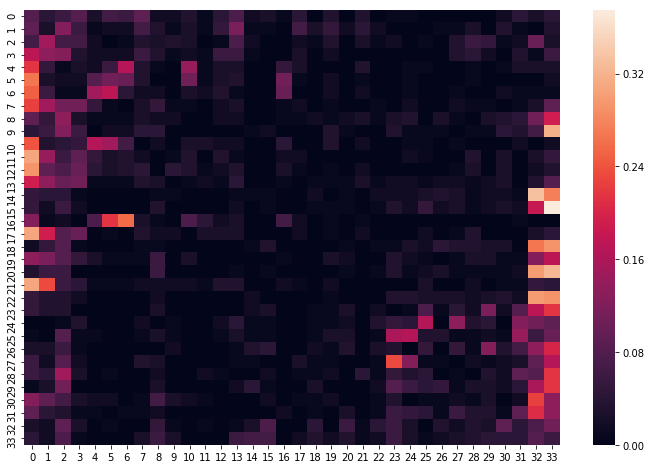

In [24]:
G = nx.karate_club_graph()
Pt = random_walk_simulation(G,120,3)
fig,ax = plt.subplots(figsize = (12,8))
sns.heatmap(Pt)
plt.show()

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  del sys.path[0]


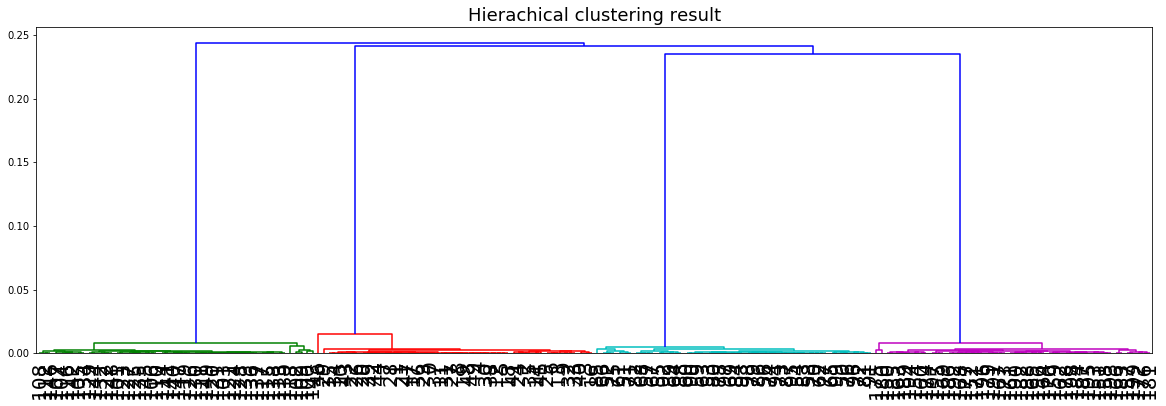

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


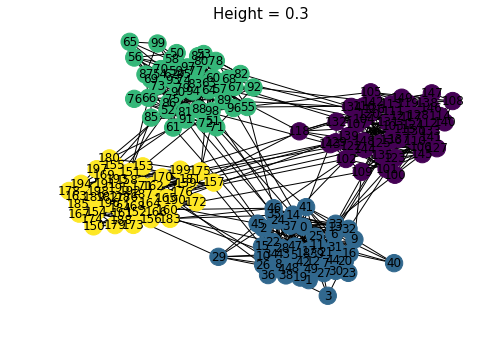

In [49]:
degrees = [d for n, d in sorted(dict(nx.degree(G)).items(),key =lambda x:x[0])]
D = np.eye(len(G.nodes))*degrees
D_12 = np.sqrt(np.linalg.inv(D))

# similarity matrix
sim_mat = np.zeros((n_nodes,n_nodes))
for i in range(n_nodes):
    for j in range(n_nodes):
        sim_ij = np.sqrt(np.square(np.dot(D_12,Pt[i,:]) - np.dot(D_12,Pt[j,:])).sum())
        sim_mat[i,j] = sim_ij
        
fig,ax = plt.subplots(figsize = (20,6))
mergeings = linkage(sim_mat,method = 'complete',metric = 'cosine')

dendro = dendrogram(mergeings,labels = np.arange(n_nodes),leaf_rotation = 90,leaf_font_size = 20)
plt.title("Hierachical clustering result",fontsize = 18)
plt.show()

labels = fcluster(mergeings, 4,criterion = 'maxclust')
nx.draw(G,node_color = labels,with_labels = True)
plt.title('Height = 0.3',fontsize = 15)
plt.show()

### Mering communities（unfinished）

In [81]:
g = nx.karate_club_graph()

G = g.copy()
retrieve_community = lambda G:[d['community'] for n,d in G.nodes(data = True)]

# step 1: assign communities to each node with nodename
for n,d in G.nodes(data=True):
    d['community'] = n 
    
# step 2: compute randomwalk matrix
Pt = random_walk_simulation(G,20,3)


graph_seq = []
for _ in range(len(G.nodes)-1):
    
    comms = {com:i for i, com in enumerate(sorted(set([d['community'] for n,d in G.nodes(data = True)])))}
    for n,d in G.nodes(data = True):
        d['community'] = comms[d['community']]
    
    # retrieve community from graph
    communities = np.array(retrieve_community(G))

    # step 3: community random walk matrix
    comm_nodes = dict()
    Pcmm = []
    for c in set(communities):
        nodes = np.where(communities == c)[0]
        vec = Pt[nodes].sum(axis = 0) / len(nodes)
        Pcmm.append(vec.tolist())
        comm_nodes[c] = nodes
    Pcmm = np.array(Pcmm)

    # compute distance matrix
    D = np.eye(len(G.nodes))*degrees
    D_12 = np.sqrt(np.linalg.inv(D))
    
    
    n_communities = len(Pcmm)

    r_mat = np.zeros((n_communities,n_communities))
    for i in range(n_communities):
        for j in range(n_communities):
            r_ij = np.sqrt(np.square(np.dot(D_12,Pcmm[i,:]) - np.dot(D_12,Pcmm[j,:])).sum())
            r_mat[i,j] = r_ij

    for i in range(n_communities):
        r_mat[i,i] = 1e10 

    communities_to_merge = np.where(r_mat == r_mat.min())
    c1,c2 = communities_to_merge[0][0],communities_to_merge[1][0]

    for c,nodes in comm_nodes.items():
        if c == c2:
            for node in nodes:
                G.node[node]['community'] = c1
                
            
    graph_seq.append(G.copy())

In [82]:
G.nodes(data = True)

NodeDataView({0: {'club': 'Mr. Hi', 'community': 0}, 1: {'club': 'Mr. Hi', 'community': 0}, 2: {'club': 'Mr. Hi', 'community': 0}, 3: {'club': 'Mr. Hi', 'community': 0}, 4: {'club': 'Mr. Hi', 'community': 0}, 5: {'club': 'Mr. Hi', 'community': 0}, 6: {'club': 'Mr. Hi', 'community': 0}, 7: {'club': 'Mr. Hi', 'community': 0}, 8: {'club': 'Mr. Hi', 'community': 0}, 9: {'club': 'Officer', 'community': 0}, 10: {'club': 'Mr. Hi', 'community': 0}, 11: {'club': 'Mr. Hi', 'community': 0}, 12: {'club': 'Mr. Hi', 'community': 0}, 13: {'club': 'Mr. Hi', 'community': 0}, 14: {'club': 'Officer', 'community': 0}, 15: {'club': 'Officer', 'community': 0}, 16: {'club': 'Mr. Hi', 'community': 0}, 17: {'club': 'Mr. Hi', 'community': 0}, 18: {'club': 'Officer', 'community': 0}, 19: {'club': 'Mr. Hi', 'community': 0}, 20: {'club': 'Officer', 'community': 0}, 21: {'club': 'Mr. Hi', 'community': 0}, 22: {'club': 'Officer', 'community': 0}, 23: {'club': 'Officer', 'community': 0}, 24: {'club': 'Officer', 'comm

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


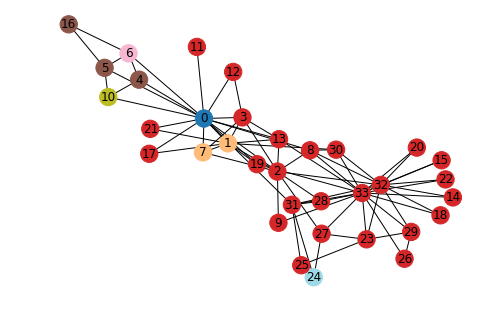

In [83]:
S = graph_seq[26]
cc = [d['community'] for n,d in S.nodes(data = True)]
nx.draw(S,node_color=cc,with_labels = True,cmap = plt.get_cmap('tab20'))

In [ ]:
nx.algorithms.centrality